In [ ]:
# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



USaremos  el conjunto de datos de anuncios de redes sociales. El conjunto de datos contiene los detalles de los usuarios en un sitio de redes sociales para averiguar si un usuario compra un producto haciendo clic en el anuncio en el sitio en función de su salario, edad y sexo. se puede encontrar en [texto del vínculo](https://www.kaggle.com/rakeshrau/social-network-ads

In [ ]:
# Importando el dataset
dataset = pd.read_csv('https://drive.google.com/uc?id=1gnclxgD2jG5NuWJi1hJlwkLkEtIcG7nB')
dataset


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset[dataset.Purchased==0]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
377,15800215,Female,42,53000,0
380,15683758,Male,42,64000,0
387,15627220,Male,39,71000,0
394,15757632,Female,39,59000,0


In [ ]:
257/400

0.6425

In [ ]:
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

### Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape

(320, 3)

### Escala de características

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train
X_test

array([[ 1.02532046e+00, -7.98950822e-01,  4.94607583e-01],
       [-9.75304830e-01, -2.12648508e-02, -5.77359062e-01],
       [ 1.02532046e+00, -3.12897090e-01,  1.46942725e-01],
       [-9.75304830e-01, -7.98950822e-01,  2.62831011e-01],
       [-9.75304830e-01, -3.12897090e-01, -5.77359062e-01],
       [ 1.02532046e+00, -1.09058306e+00, -1.44652121e+00],
       [-9.75304830e-01, -7.01740076e-01, -1.59138156e+00],
       [ 1.02532046e+00, -2.15686344e-01,  2.14601566e+00],
       [-9.75304830e-01, -1.96547978e+00, -5.58617754e-02],
       [ 1.02532046e+00,  8.53631867e-01, -7.80163563e-01],
       [ 1.02532046e+00, -7.98950822e-01, -6.06331134e-01],
       [-9.75304830e-01, -9.93372315e-01, -4.32498705e-01],
       [ 1.02532046e+00, -1.18475597e-01, -4.32498705e-01],
       [ 1.02532046e+00,  7.59458956e-02,  2.04886868e-01],
       [ 1.02532046e+00, -1.77105829e+00,  4.65635512e-01],
       [-9.75304830e-01, -6.04529329e-01,  1.36376973e+00],
       [ 1.02532046e+00, -1.18475597e-01

-  Entrenamiento del modelo Naive Bayes en el conjunto de entrenamiento

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)



GaussianNB()

### Predicción de los resultados del conjunto de pruebas

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred.size

80

- La matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac # acuraccy

0.925

In [ ]:
cm

array([[56,  2],
       [ 4, 18]])

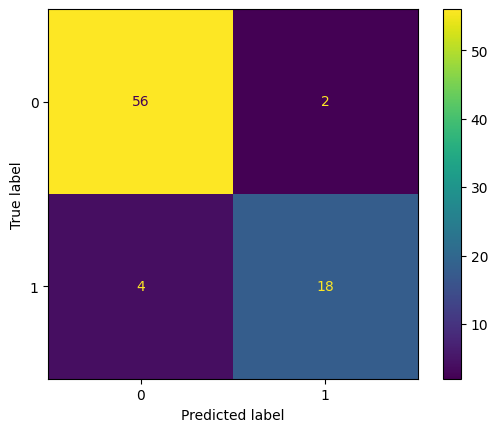

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

plt.show()


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

In [ ]:
recall_score(y_test, y_pred)

0.8181818181818182

In [ ]:
precision_score(y_test, y_pred)

0.9

In [ ]:
f1_score(y_test, y_pred)

0.8571428571428572

In [ ]:
56/60

0.9333333333333333

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
modelo1=LogisticRegression()

In [42]:
modelo1.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred1=modelo1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [46]:
confusion_matrix(y_test, y_pred1)

array([[56,  2],
       [ 5, 17]])

In [48]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

